# Stats research project
By: Arthur, Jarno and Bas 




 ## Table of contents
- [Who did what](#who-did-what)
- [Research Question](#research-question)
- [Survey Questions](#survey-questions)
- [Sampling considerations](#sampling-considerations)
- [Data collection method](#data-collection-method)
- [Visualize, Analyze, and Interpret](#visualize-analyse-and-interpret)
- [Conclusion](#Conclusion)
- [Final Thoughts](#final-thoughts)



## Who did what

| Task | Who |
| --- | --- |
| Setup research question | All |
| Create survey questions | All |
| Create survey | Jarno |
| Data gathering High school | Bas |
| Data gathering University of applied science | Arthur & Jarno |
| Final research report Jupyter notebook | All |


 ## Research Question
 How has the integration of Artificial Intelligence (AI) impacted productivity among students at Fontys FHICT compared to students in high school?

 ---

## Survey Questions
What is your age?
- 12-18
- 18-24
- 25+

What is your current level of education?
- University of applied science 
- High school

Which AI tool(s) do you currently use or have you used for your study?
- ChatGPT
- Google Gemini
- Claude 3
- Other (input field)

How frequently do you utilize AI-powered tools or technologies to assist in your coursework or projects?
- Rarely
- Occasionally
- Sometimes
- Often
- Always

How familiar are you with the use of AI in your study?
- Not familiar at all
- Slightly familiar
- Moderately familiar
- Very familiar
- Extremely familiar

How helpful do you find AI in getting your schoolwork done more efficiently?
- Not helpful at all
- Slightly helpful
- Moderately helpful
- Very helpful
- Extremely helpful

Do you feel like AI has helped you improve your study strategies?
- Strongly disagree
- Disagree
- Neither agree nor disagree
- Agree
- Strongly agree


In what specific ways do you think AI has influenced your productivity?
- (Open-ended)

Have you encountered any challenges or limitations in utilizing AI for schoolwork? If yes, please specify?
- (Open-ended)

How do you perceive the future role of AI in enhancing productivity within your field of study?
- (Open-ended)

---

## Sampling Considerations
The sampling will be conducted within Fontys University, focusing on students from the Fontys FHICT department as the primary group of interest.\
Another group will be selected from Bas’s highschool where he will ask the same survey to a class ranging from 4th to 6th years
The data points will be N > 30 to ensure statistical validity.


## Data Collection Method
Surveys will be distributed electronically via email to student. This makes sure that we don't have any sampling bias 

## Visualize, Analyse, and Interpret

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
data = pd.read_excel('Statistics_survey_Responses.xlsx')

# Assuming the helpfulness ratings are ordinal, encode them
helpfulness_mapping = {
    'Not helpful at all': 1,
    'Slightly helpful': 2,
    'Moderately helpful': 3,
    'Very helpful': 4,
    'Extremely helpful': 5
}
data['HelpfulnessLevel'] = data['How helpful do you find AI in getting your schoolwork done more efficiently?'].map(helpfulness_mapping)

# Clean the data by dropping rows where 'HelpfulnessLevel' is missing
clean_data = data.dropna(subset=['HelpfulnessLevel'])

# Group data by level of education
clean_data['Level of education'] = np.where(clean_data['What is your current level of education?'] == 'University of applied science', 'University of applied science', 'High school')

highschool_students = clean_data[clean_data['Level of education'] == 'High school']['HelpfulnessLevel']
UoAS_Students = clean_data[clean_data['Level of education'] == 'University of applied science']['HelpfulnessLevel']

# Perform t-test
t_stat, p_val = stats.ttest_ind(highschool_students, UoAS_Students, nan_policy='omit')

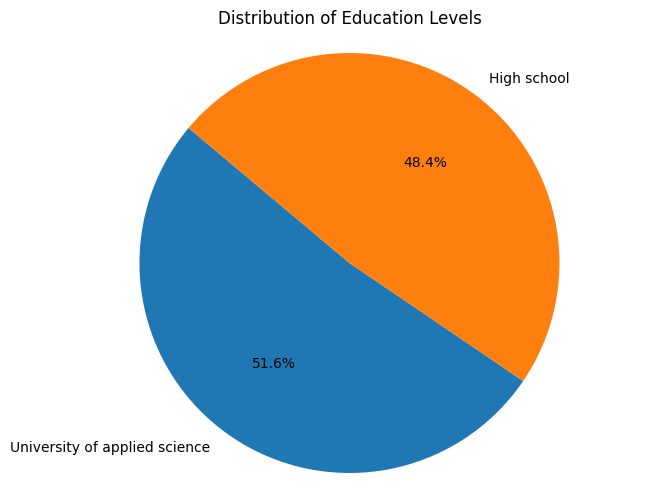

In [94]:
# Pie chart of education levels
education_counts = clean_data['Level of education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.axis('equal')
plt.show()

We tried to aim for a 50/50 distribution and have gotten close enough so that this does not mess with our data

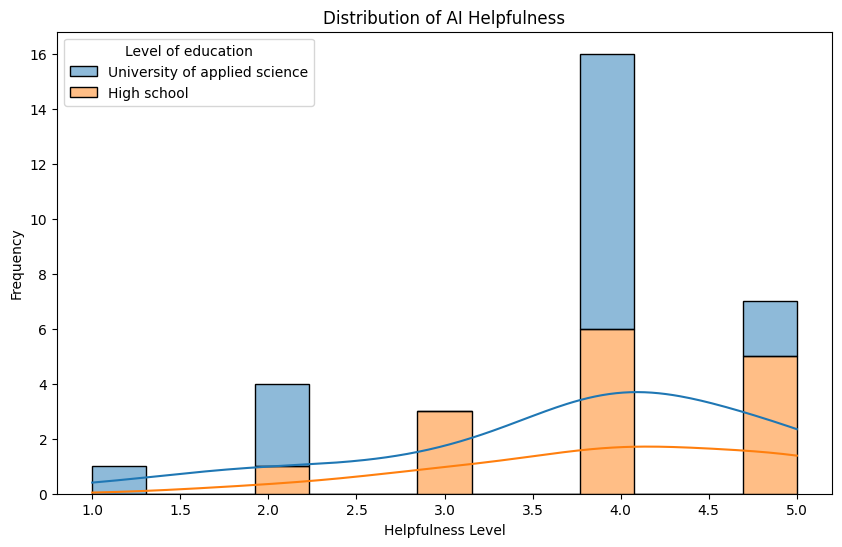

In [95]:
# Histogram of AI Helpfulness by group
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_data, x='HelpfulnessLevel', kde=True, hue='Level of education', multiple='stack')
plt.title('Distribution of AI Helpfulness')
plt.xlabel('Helpfulness Level')
plt.ylabel('Frequency')
plt.show()


Here we can see that most people think that AI is helping them in their school or work as there is a positive trend line

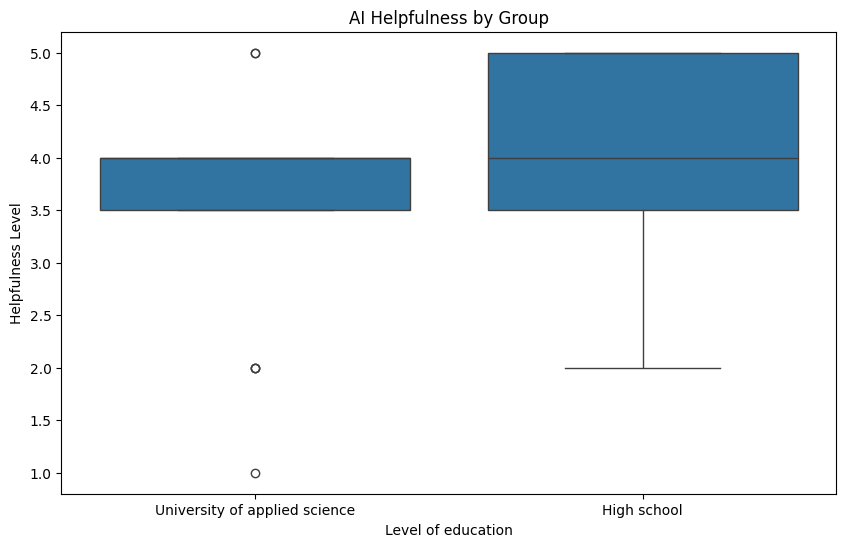

In [96]:
# Boxplot of AI Helpfulness by group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level of education', y='HelpfulnessLevel', data=clean_data)
plt.title('AI Helpfulness by Group')
plt.xlabel('Level of education')
plt.ylabel('Helpfulness Level')
plt.show()


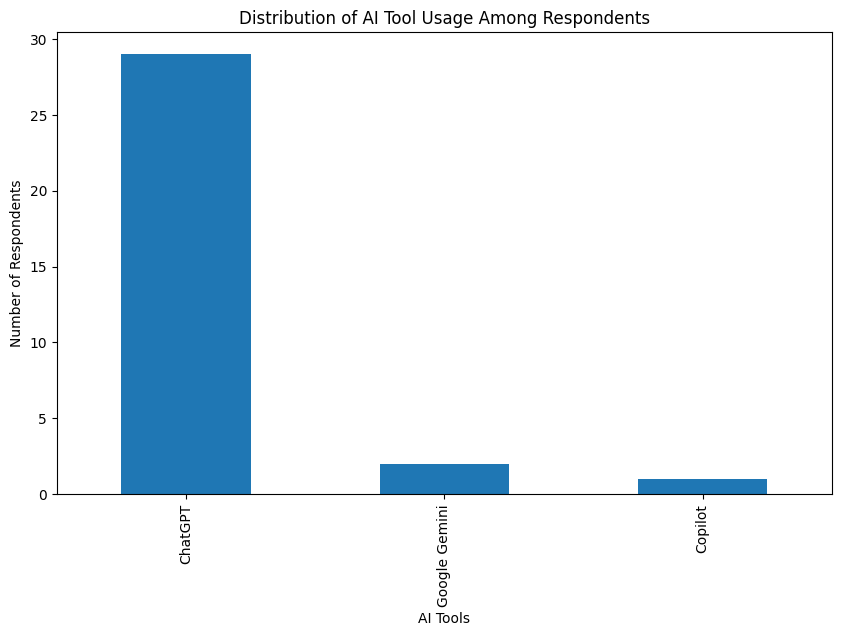

In [97]:

clean_data.dropna(subset=['Which AI tool(s) do you currently use or have used for your study?'], inplace=True)

# Convert all values in the column to strings and split them by commas
tools_list = [tool.strip() for row in clean_data['Which AI tool(s) do you currently use or have used for your study?'].astype(str) for tool in row.split(',')]

# Count the occurrences of each tool
tool_counts = pd.Series(tools_list).value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
tool_counts.plot(kind='bar')
plt.title('Distribution of AI Tool Usage Among Respondents')
plt.xlabel('AI Tools')
plt.ylabel('Number of Respondents')
plt.show()


Here we can see that almost all participants use the same tool and only a fraction have tried Gemini or Copilot. Copilot can be a lower number due to halve the participants being from Highschool and more than likely not having any coding experience thus not needing a coding assistant

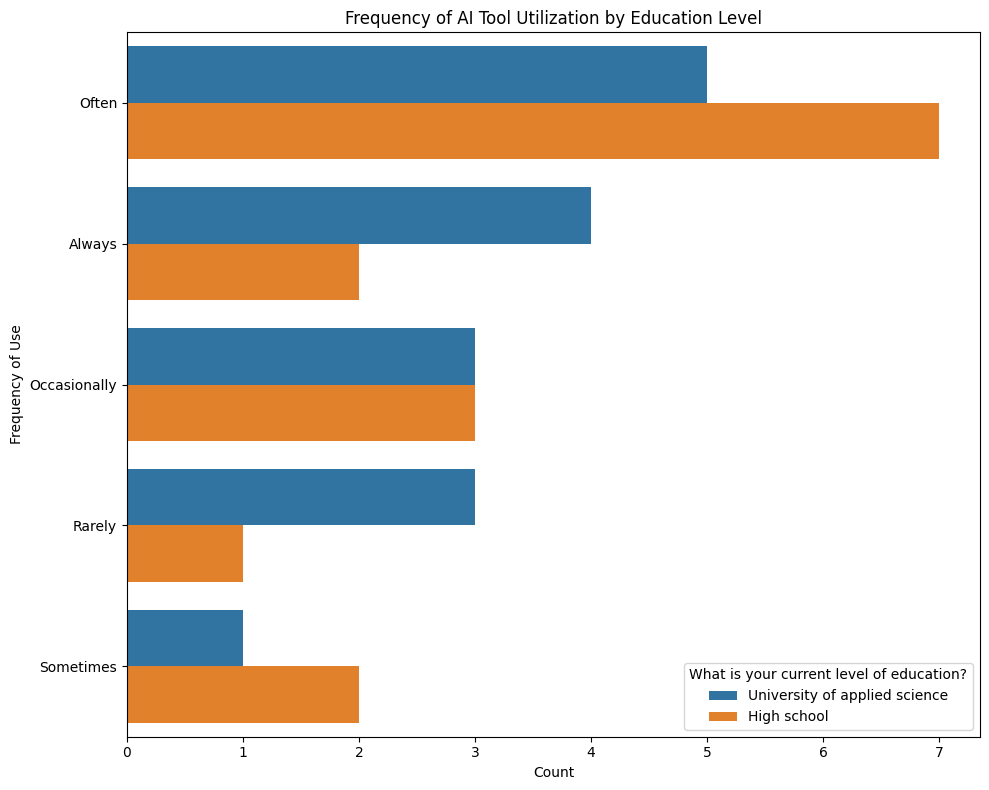

In [101]:
# Frequency of AI Tool Utilization
plt.figure(figsize=(10, 8))
sns.countplot(y='How frequently do you utilize AI-powered tools or technologies to assist in your schoolwork or projects?', 
              hue='What is your current level of education?', 
              data=data,
              order=data['How frequently do you utilize AI-powered tools or technologies to assist in your schoolwork or projects?'].value_counts().index)
plt.title('Frequency of AI Tool Utilization by Education Level')
plt.xlabel('Count')
plt.ylabel('Frequency of Use')
plt.tight_layout()
plt.show()


As seen above both groups heavily use AI tools but we cannot make a clear distinction between which groups uses them more than the other

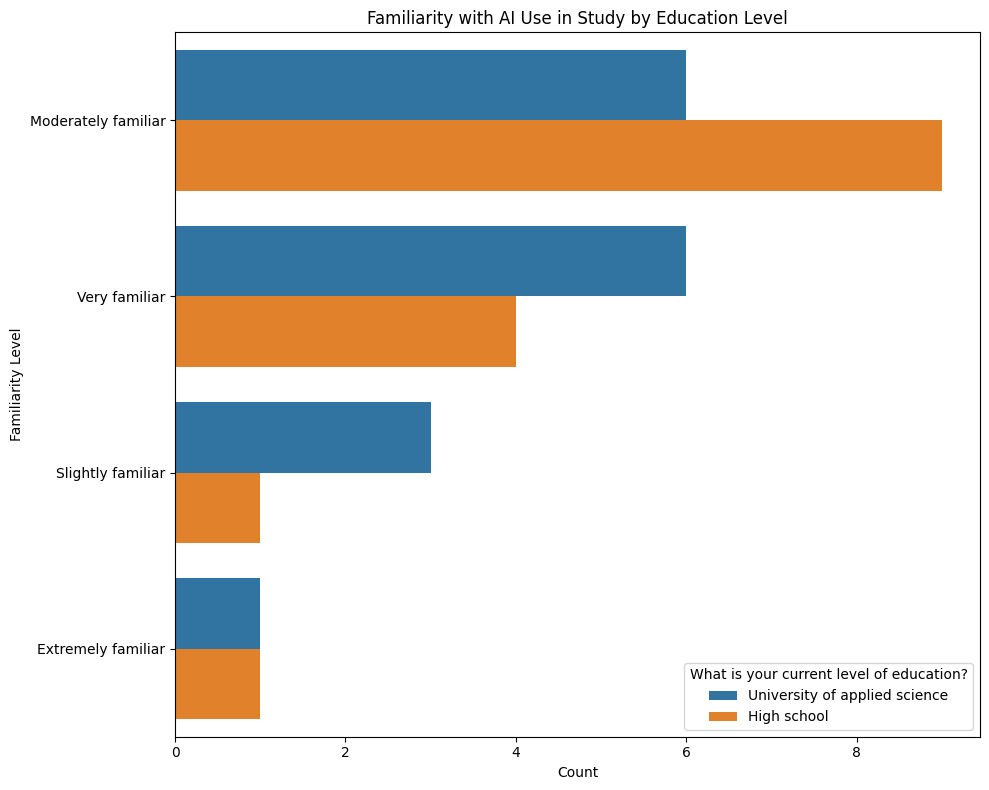

In [99]:
plt.figure(figsize=(10, 8))
sns.countplot(y='How familiar are you with the use of AI in your study?', 
              hue='What is your current level of education?', 
              data=data, 
              order=data['How familiar are you with the use of AI in your study?'].value_counts().index)
plt.title('Familiarity with AI Use in Study by Education Level')
plt.xlabel('Count')
plt.ylabel('Familiarity Level')
plt.tight_layout()
plt.show()

As seen above both groups heavily use AI tools but we cannot make a clear distinction between which groups uses them more than the other

## Conclusion
### AI's Influence on Productivity
Time Efficiency: A significant number of respondents mentioned that AI tools have significantly reduced the time it takes to complete certain tasks, such as data analysis, writing, and research. Tools like AI writing assistants and data analysis software were frequently cited as examples that help streamline their workflow.

Enhanced Learning: Some respondents highlighted how AI applications in educational platforms provide personalized learning experiences, which has helped them understand complex topics more effectively. This personalized approach has made studying more efficient and enjoyable.

Improved Research and Writing Quality:
AI's ability to generate ideas, proofread, and suggest improvements has enhanced the quality of research papers and assignments. Respondents appreciated how AI tools offer insights they might not have considered, leading to more comprehensive and higher-quality work.

### Challenges and Limitations in Utilizing AI for Schoolwork
Reliability Concerns: 
A common challenge mentioned was the reliability of AI-generated content. Some students expressed concerns over the accuracy of information provided by AI, highlighting instances where AI tools provided outdated or incorrect data.

Learning Curve: 
The need to understand how to use AI tools effectively was another challenge. A few respondents felt that getting accustomed to AI functionalities and integrating them into their workflow took time, which initially hindered their productivity.

Ethical and Originality Issues: 
Ethical considerations and worries about the originality of AI-generated work were significant concerns. Students are cautious about using AI in a way that respects academic integrity, with some institutions having unclear guidelines on AI usage.

### Perceptions of the Future Role of AI in Enhancing Productivity
Optimistic Outlook: 
The majority of respondents are optimistic about the role of AI in the future, expecting it to become an even more integral part of their educational and professional tools. They anticipate advancements in AI will lead to even more personalized and efficient learning experiences.

Need for Adaptation: 
There's a recognition that both educational institutions and students need to adapt to the evolving AI landscape. This includes updating curriculums to include AI literacy and ensuring that students are prepared to use AI responsibly.

Concerns About Over-reliance: 
While optimistic, some respondents voiced concerns about becoming overly reliant on AI for critical thinking and problem-solving tasks. They stress the importance of maintaining a balance between AI assistance and developing independent analytical skills.

## Final Thoughts
So the integration of AI on the productivity among students at Fontys FHICT and students in high school lead to a positive impact in their productivity, research and writing as well as some other activities. This is probably why we see such a large amount of participants using the tools frequently. However we cannot conclude a significant difference between the students at Bas's highschool and the students at Fontys FHICT